In [5]:
import matplotlib.pyplot as plt

In [13]:
def cal_option(k= 3000, start=2500, end = 3500, step=10, option_type=1, direction=1, premium = 200):
    x = []
    y = []
    for s in range(start, end, step):
        pnl = direction * (max(option_type * (s - k), 0) - premium)
        x.append(s)
        y.append(pnl)
    plt.plot(x, y)

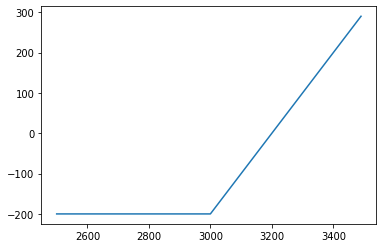

In [15]:
#  买入看涨
cal_option(k=3000, start=2500, end=3500, step=10, option_type=1, direction=1, premium=200)

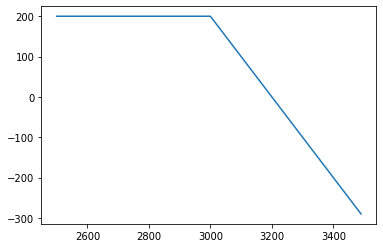

In [16]:
# 卖出看涨
cal_option(k=3000, start=2500, end=3500, step=10, option_type=1, direction=-1, premium=200)

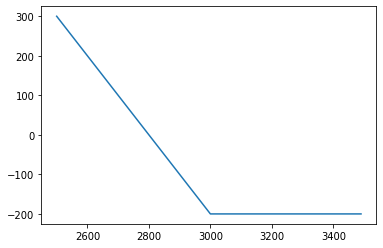

In [17]:
# 买入看跌
cal_option(k=3000, start=2500, end=3500, step=10, option_type=-1, direction=1, premium=200)

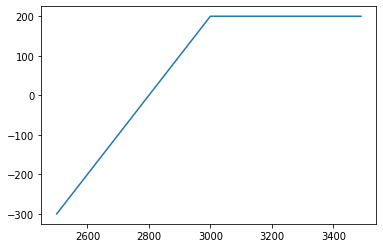

In [21]:
# 卖出看跌
cal_option(k=3000, start=2500, end=3500, step=10, option_type=-1, direction=-1, premium=200)

In [1]:
from vnpy.app.script_trader import init_cli_trading
from vnpy.gateway.ctp import CtpGateway
from vnpy.trader.utility import load_json

In [2]:
# 连接CTP
setting = load_json('connect_ctp.json')
engine = init_cli_trading([CtpGateway])
engine.connect_gateway(setting, 'CTP')

2020-08-19 14:06:38.266768	行情服务器连接成功
2020-08-19 14:06:38.271759	交易服务器连接成功
2020-08-19 14:06:38.331641	行情服务器登录成功
2020-08-19 14:06:38.332588	交易服务器授权验证成功
2020-08-19 14:06:38.536100	交易服务器登录成功
2020-08-19 14:06:39.026733	结算信息确认成功
2020-08-19 14:06:52.499750	合约信息查询成功


In [7]:
strike_prices = list(range(3300, 4200, 50))
vt_symbols = ['TA010.CZCE']
for strike_price in strike_prices:
    vt_symbol = f'TA010C{strike_price}.CZCE'
    vt_symbols.append(vt_symbol)
engine.subscribe(vt_symbols)
print(vt_symbols)

['TA010.CZCE', 'TA010C3300.CZCE', 'TA010C3350.CZCE', 'TA010C3400.CZCE', 'TA010C3450.CZCE', 'TA010C3500.CZCE', 'TA010C3550.CZCE', 'TA010C3600.CZCE', 'TA010C3650.CZCE', 'TA010C3700.CZCE', 'TA010C3750.CZCE', 'TA010C3800.CZCE', 'TA010C3850.CZCE', 'TA010C3900.CZCE', 'TA010C3950.CZCE', 'TA010C4000.CZCE', 'TA010C4050.CZCE', 'TA010C4100.CZCE', 'TA010C4150.CZCE']


In [9]:
underlying_price = engine.get_tick('TA010.CZCE').last_price
print(underlying_price)
for strike_price in strike_prices:
    vt_symbol = f'TA010C{strike_price}.CZCE'
    tick = engine.get_tick(vt_symbol)
    if tick:
        space_value = max((underlying_price - strike_price), 0)
        time_value = tick.last_price - space_value
        
        if time_value < 0:
            print('******')
            
            print('=================================')
            print(f'期权代码：{tick.symbol}')
            print(f'期权价格：{tick.last_price}')
            print(f'行权价格：{strike_price}')
            print(f'标的物当前价：{underlying_price}')
            print(f'期权空间价值：{space_value}')
            print(f'期权时间价值：{time_value}')


3680.0


In [21]:
the = 'IO2008-C-4000.CFFEX'
#the = 'IF2008.CFFEX'
engine.subscribe([the])

In [22]:
tick = engine.get_tick(the)
print(tick)

None
